LOGISTIC REGRESSION

Github link-

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r"C:\Users\guddi\Desktop\ML\heart.csv")


In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Attribute Information : 1-age

2-sex

3-chest pain type (4 values)

4-resting blood pressure

5-serum cholestoral in mg/dl

6-fasting blood sugar > 120 mg/dl

7-resting electrocardiographic results (values 0,1,2)

8-maximum heart rate achieved

9-exercise induced angina

10-oldpeak = ST depression induced by exercise relative to rest


11-the slope of the peak exercise ST segment

12-number of major vessels (0-3) colored by flourosopy

13-thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

14-target: 0= less chance of heart attack 1= more chance of heart attack


In [6]:
#spilting data in X and y as independent and dependdent variable
X = data[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y = data[['target']]

In [7]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.351932
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.489     
Dependent Variable: target           AIC:              239.2711  
Date:               2020-11-19 22:35 BIC:              287.5496  
No. Observations:   303              Log-Likelihood:   -106.64   
Df Model:           12               LL-Null:          -208.82   
Df Residuals:       290              LLR p-value:      4.0884e-37
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
age            0.0128    0.0191   0.6701  0.5028  -0.0246   0.0501
sex           -1.6381    0.4519  -3.6250  0.0003  -2.5237  -0.

In [8]:
#implimenting logistic regression
logreg = LogisticRegression()
logreg.fit(X, y)

C:\Users\guddi\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\guddi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
y_pred = logreg.predict(X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X, y)))

Accuracy of logistic regression classifier on test set: 0.85


In [10]:
y_pred = logreg.predict(X)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X, y)))

Accuracy of logistic regression classifier on test set: 0.85


In [11]:
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)

[[106  32]
 [ 12 153]]


In [12]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       138
           1       0.83      0.93      0.87       165

    accuracy                           0.85       303
   macro avg       0.86      0.85      0.85       303
weighted avg       0.86      0.85      0.85       303



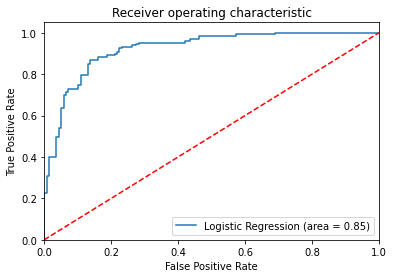

In [13]:
logit_roc_auc = roc_auc_score(y, logreg.predict(X))
fpr, tpr, thresholds = roc_curve(y, logreg.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()